# Module 4: Labs Bivariate analysis - 2 qualitative variables


In [299]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

## Labo 1 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

The research data can be found in the file data/MuziekWijn.csv.

1. Set up the correct crosstab.
2. Determine the marginal totals.
3. Determine the expected results.
4. Calculate the χ² test statistic.
5. Calculate Cramér's V. What can you conclude from this?

Visualize the data set:

1. Plot a bar chart showing the percentages of types of wine sold when no music was playing.
2. Plot a clustered bar chart of the dataset
3. Plot a bar chart (stacked bar chart) of the dataset

Results of the main calculations (rounded up to 3 decimal places):

* χ² ≈ 18.279
* Cramér's V ≈ 0.194

In [300]:
data = pd.read_csv("../data/MuziekWijn.csv")
data.head()

,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse


Read the dataset

Give the names of both columns. What is wrong?

In [301]:
data = data.rename(columns = {" Wijn": "Wijn"})


In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Muziek  243 non-null    object
 1   Wijn    243 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


You can change the name of a column 'ab' to the column 'abc' of the dataframe df, using the following command

`df = df.rename(columns={'ab': 'abc'})`

Use this command to change the column name.  
Check afterwards if the result is correct.

In [303]:
data

,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse
...,...,...
238,Geen,Andere
239,Franse,Franse
240,Franse,Franse
241,Franse,Franse


1. Set up the correct crosstab.

In [304]:
pd.crosstab(data['Muziek'], data['Wijn'],margins=False)

Wijn,Andere,Franse,Italiaanse
Muziek,,,
Franse,35,39,1
Geen,43,30,11
Italiaanse,35,30,19


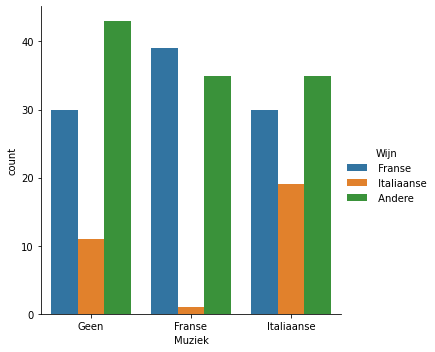

In [305]:
sns.catplot(data=data, x='Muziek', hue='Wijn', kind='count')

2. Determine the marginal totals.

In [306]:
observed = pd.crosstab(data.Muziek, data.Wijn)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(row_sums)
print(col_sums)
print(f'Number of observations: {n}')

Muziek
Franse        75
Geen          84
Italiaanse    84
dtype: int64
Wijn
 Andere        113
 Franse         99
 Italiaanse     31
dtype: int64
Number of observations: 243


3. Determine the expected results.

In [307]:
expected = np.outer(row_sums, col_sums) / n
expected

array([[34.87654321, 30.55555556,  9.56790123],
       [39.0617284 , 34.22222222, 10.71604938],
       [39.0617284 , 34.22222222, 10.71604938]])

In [308]:
exp_row_sums = np.sum(expected, axis=1)
exp_col_sums = np.sum(expected, axis=0)

print(f'Row totals   : {exp_row_sums}')
print(f'Column totals: {exp_col_sums}')
print(f'Observations : {exp_col_sums.sum()}')

Row totals   : [75. 84. 84.]
Column totals: [113.  99.  31.]
Observations : 243.0


In [309]:
expected - observed

Wijn,Andere,Franse,Italiaanse
Muziek,,,
Franse,-0.123457,-8.444444,8.567901
Geen,-3.938272,4.222222,-0.283951
Italiaanse,4.061728,4.222222,-8.283951


In [310]:
diffs = (observed - expected)**2 / expected
print(diffs)

Wijn          Andere    Franse   Italiaanse
Muziek                                     
Franse      0.000437  2.333737     7.672417
Geen        0.397063  0.520924     0.007524
Italiaanse  0.422348  0.520924     6.403837


4. Calculate the χ² test statistic.

In [311]:
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

χ² ≈ 18.279


In [312]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)

0.19393696480652944


In [313]:
alpha = .05
dimensions = observed.shape
dof = (dimensions[0]-1) * (dimensions[1]-1)

print("Chi-squared        : %.4f" % chi_squared)
print("Degrees of freedom : %d" % dof)

# Calculate critical value
g = stats.chi2.isf(alpha, df = dof)
print("Critical value     : %.4f" % g)

# Calculate p-value
p = stats.chi2.sf(chi_squared, df=dof)
print("p-value            : %.4f" % p)                  # critical value

Chi-squared        : 18.2792
Degrees of freedom : 4
Critical value     : 9.4877
p-value            : 0.0011


In [314]:
# Chi-squared test for independence based on a contingency table
observed = pd.crosstab(data.Muziek, data.Wijn)
chi2, p, df, expected = stats.chi2_contingency(observed)

print("Chi-squared       : %.4f" % chi2)
print("Degrees of freedom: %d" % df)
print("P-value           : %.4f" % p)

Chi-squared       : 18.2792
Degrees of freedom: 4
P-value           : 0.0011


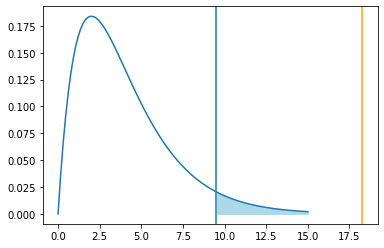

In [315]:
# Is there an association?

# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)  # TODO: CHECK this!

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

5. Calculate Cramér's V. What can you conclude from this?

In [316]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)

0.19393696480652944


Plot a bar chart showing the percentages of types of wine sold when no music was playing.

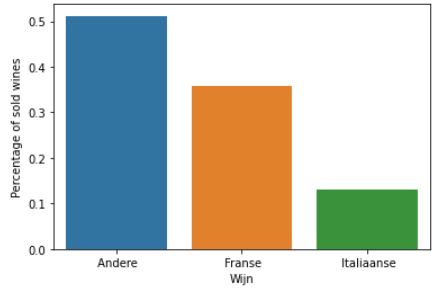

<AxesSubplot:xlabel='Wijn', ylabel='Geen'>

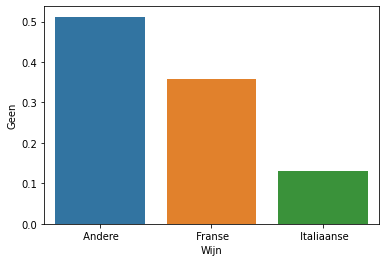

In [317]:
sns.barplot(x = observed.loc['Geen'].index, y = observed.loc['Geen'] / np.sum(observed.loc['Geen']))

Plot a clustered bar chart of the dataset  

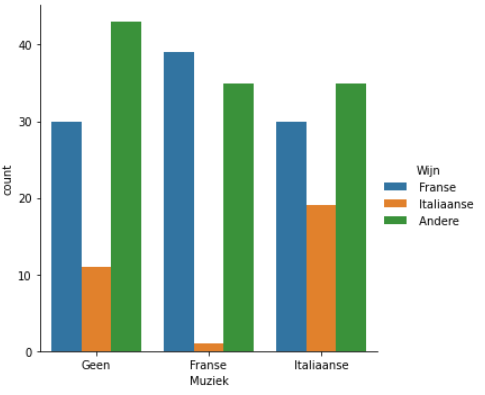

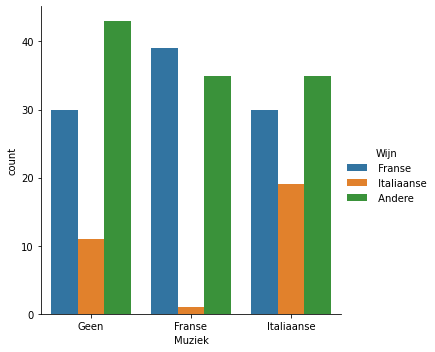

In [318]:
sns.catplot(data=data, x='Muziek', hue='Wijn', kind='count')

Plot a bar chart (stacked bar chart) of the dataset

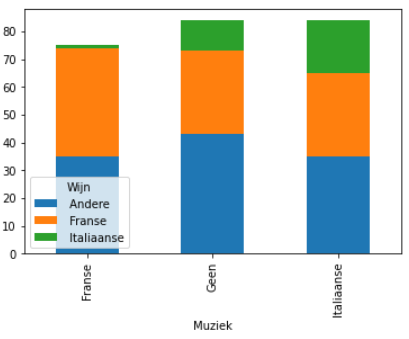

## Labo 2 - Survey

Load the data file data/survey.csv. It contains the result of a survey of students from an Australian university.

We want to investigate the relationship between some discrete (nominal or ordinal) variables in this dataset. For any pairs of variables listed below, follow these steps:

* First, think about what exactly you expect for the given combination of variables.
* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
- Looking at the chart, do you expect a rather high or rather low value for the $\chi^2$ statistic? Why?
* Run the $\chi^2$ test to determine whether there is a relationship between the two variables. Calculate the $\chi^2$ statistic, the critical limit $g$ and the $p$ value, each for significance level $\alpha = 0.05$.
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the $\chi^2$ test?


The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Read the dataset.

In [319]:
data = pd.read_csv("../data/survey.csv")
data

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,Female,18.0,18.0,Right,L on R,85.0,Right,Some,Never,165.1,Imperial,17.667
233,234,Female,18.5,18.0,Right,L on R,88.0,Right,Some,Never,160.0,Metric,16.917
234,235,Female,17.5,16.5,Right,R on L,NaN,Right,Some,Never,170.0,Metric,18.583
235,236,Male,21.0,21.5,Right,R on L,90.0,Right,Some,Never,183.0,Metric,17.167


What are the different values for Exer and Smoke?  
Change both variables to ordinal variables with a specific order.

In [320]:
# change columns 'Exer' and 'Smoke' to ordinal values with an order
data['Exer'] = data['Exer'].astype(CategoricalDtype(categories=['None','Some','Freq'],ordered=True))
data['Smoke'] = data['Smoke'].astype(CategoricalDtype(categories=['Never','Occas','Regul','Heavy'],ordered=True))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  237 non-null    int64   
 1   Sex         236 non-null    object  
 2   Wr.Hnd      236 non-null    float64 
 3   NW.Hnd      236 non-null    float64 
 4   W.Hnd       236 non-null    object  
 5   Fold        237 non-null    object  
 6   Pulse       192 non-null    float64 
 7   Clap        236 non-null    object  
 8   Exer        237 non-null    category
 9   Smoke       236 non-null    category
 10  Height      209 non-null    float64 
 11  M.I         209 non-null    object  
 12  Age         237 non-null    float64 
dtypes: category(2), float64(5), int64(1), object(5)
memory usage: 21.3+ KB


In [321]:
pd.crosstab(data['Exer'], data['Smoke'],margins=False)

Smoke,Never,Occas,Regul,Heavy
Exer,,,,
None,18,3,1,1
Some,84,4,7,3
Freq,87,12,9,7


* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
* Looking at the chart, do you expect a rather high or rather low value for the  χ2  statistic? Why?
* Run the  χ2  test to determine whether there is a relationship between the two variables. Calculate the  χ2  statistic, the critical limit  g  and the  p  value, each for significance level  α=0.05 .
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the  χ2  test?

The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Exer/Smoke: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483

In [322]:
alpha = 0.05
observerd = pd.crosstab(data.Exer, data.Smoke,margins=False)
chi2, p, df, expected = stats.chi2_contingency(observerd)
g = stats.chi2.isf(alpha, df)
print("Chi-squared       : %.4f" % chi2)
print("G-value           : %.4f" % g)
print("P-value           : %.4f" % p)


Chi-squared       : 5.4885
G-value           : 12.5916
P-value           : 0.4828


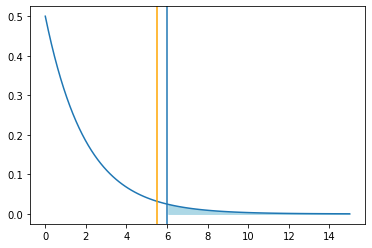

In [323]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

W.Hnd/Fold: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454

In [324]:
alpha = 0.05
observerd = pd.crosstab(data['W.Hnd'], data.Fold,margins=False)
chi2, p, df, expected = stats.chi2_contingency(observerd)
g = stats.chi2.isf(alpha, df)
print("Chi-squared       : %.4f" % chi2)
print("G-value           : %.4f" % g)
print("P-value           : %.4f" % p)

Chi-squared       : 1.5814
G-value           : 5.9915
P-value           : 0.4535


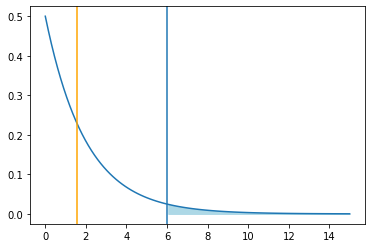

In [325]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

Sex/Smoke: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314

In [326]:

alpha = 0.05
observerd = pd.crosstab(data.Sex, data.Smoke,margins=False)
chi2, p, df, expected = stats.chi2_contingency(observerd)
g = stats.chi2.isf(alpha, df)
print("Chi-squared       : %.4f" % chi2)
print("G-value           : %.4f" % g)
print("P-value           : %.4f" % p)

Chi-squared       : 3.5536
G-value           : 7.8147
P-value           : 0.3139


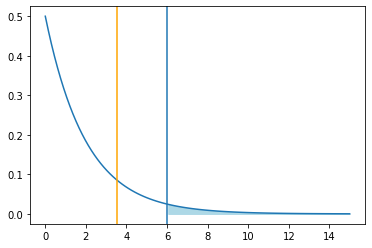

In [327]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

Sex/W.Hnd: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

In [328]:
alpha = 0.05
observerd = pd.crosstab(data.Sex, data['W.Hnd'],margins=False)
chi2, p, df, expected = stats.chi2_contingency(observerd)
g = stats.chi2.isf(alpha, df)
print("Chi-squared       : %.4f" % chi2)
print("G-value           : %.4f" % g)
print("P-value           : %.4f" % p)

Chi-squared       : 0.2356
G-value           : 3.8415
P-value           : 0.6274


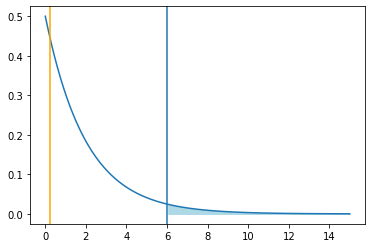

In [329]:
# Plot of the case:
# x-values:
x = np.linspace(0, 15, num=100)
# probability density of the chi-squared distribution with 4 degrees of freedom
y = stats.chi2.pdf(x, df=dof)
# the number q for which the right tail probability is exactly 5%:
q = stats.chi2.isf(alpha, df=dof)

fig, tplot = plt.subplots(1, 1)
tplot.plot(x, y)                     # probability density
tplot.fill_between(x, y, where=x>=q, # critical area
    color='lightblue')
tplot.axvline(q)                     # critical value
tplot.axvline(chi2, color='orange')  # chi-squared

## Labo 3 - Digimeter

Every year, Imec (formerly iMinds) carries out a study on the use of digital technologies in Flanders, the Digimeter (Vanhaelewyn & De Marez, 2016). In this exercise we will check whether the sample of the Digimeter 2016 (n = 2164) is representative of the population in terms of the age categories of the participants.

You can find the frequency tables in the following data files:

- `data/leeftijden-digimeter.csv`: relative frequencies of the age of participants in the iMec Digimeter 2016 and the Flemish population (as reported in the Digimeter publication)
- `data/leeftijden-bestat-vl.csv`: absolute frequencies for the different age categories of the Flemish population (Source: BelStat, <https://bestat.economie.fgov.be/bestat/> , C01.1: Population by place of residence (province), sex, position in the household (C), marital status and age (B)).  


1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.
2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate this.
3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.
4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?

Results of the main calculations (rounded up to 3 decimal places):

- χ² ≈ 6.700 (df = 6),
- g ≈ 12.592,
- p ≈ 0.350

Read the dataset `data/leeftijden-digimeter.csv`  
Make sure the Percentages are actually percentages.


In [330]:
digimeter = pd.read_csv('../data/leeftijden-digimeter.csv')
digimeter
#The column 'percentage' must be converted to a percentage
#digimeter['Percentage'] = digimeter['Percentage'] / 100
digimeter

,Leeftijdsgroep,Percentage
0,15-19,6.6
1,20-29,14.2
2,30-39,15.0
3,40-49,16.3
4,50-59,17.3
5,60-64,7.3
6,64+,23.2


Read the dataset `leeftijden-bestat-vl.csv`

In [331]:
belstat = pd.read_csv('../data/leeftijden-bestat-vl.csv')
belstat

,age.group,population
0,0-5,352017
1,5-9,330320
2,10-14,341303
3,15-19,366648
4,20-24,375469
5,25-29,387131
6,30-34,401285
7,35-39,409587
8,40-44,458485
9,45-49,493720


1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.

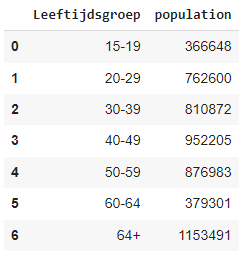

In [332]:

belstat = belstat[(belstat['age.group'] != '0-5') & (belstat['age.group'] != '5-9') & (belstat['age.group'] != '10-14')]

In [333]:
d={'15-19': '15-19', '20-24': '20-29', '25-29': '20-29', '30-34': '30-39', '35-39': '30-39', '40-44': '40-49', '45-49': '40-49','50-54': '50-59', '55-59': '50-59','60-64': '60-64'}
 

belstat['Leeftijdsgroep']=belstat['age.group']. map(d).fillna('64+')
belstat.head(20)

C:\Users\szymo\AppData\Local\Temp\ipykernel_22388\3843321679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  belstat['Leeftijdsgroep']=belstat['age.group']. map(d).fillna('64+')


,age.group,population,Leeftijdsgroep
3,15-19,366648,15-19
4,20-24,375469,20-29
5,25-29,387131,20-29
6,30-34,401285,30-39
7,35-39,409587,30-39
8,40-44,458485,40-49
9,45-49,493720,40-49
10,50-54,463668,50-59
11,55-59,413315,50-59
12,60-64,379301,60-64


In [334]:
belstat = belstat.groupby(['Leeftijdsgroep'])['population'].sum().reset_index()
belstat

,Leeftijdsgroep,population
0,15-19,366648
1,20-29,762600
2,30-39,810872
3,40-49,952205
4,50-59,876983
5,60-64,379301
6,64+,1153491


In [335]:
tot_population = belstat['population'].sum()
print(tot_population)
belstat['percentage_population'] = belstat['population'] / tot_population
belstat

5302100


,Leeftijdsgroep,population,percentage_population
0,15-19,366648,0.069151
1,20-29,762600,0.143830
2,30-39,810872,0.152934
3,40-49,952205,0.179590
4,50-59,876983,0.165403
5,60-64,379301,0.071538
6,64+,1153491,0.217554


In [336]:
n = 2164
expected_p = np.array(belstat['percentage_population']) 
expected = expected * n
print(expected)
print(expected_p)


[[ 18315.72765957 234872.27234043]
 [ 18472.27234043 236879.72765957]]
[0.06915147 0.1438298  0.15293412 0.17959016 0.16540295 0.07153788
 0.21755361]


In [337]:
observed = np.array(digimeter['Percentage'])/100 * n
observed

array([142.824, 307.288, 324.6  , 352.732, 374.372, 157.972, 502.048])

2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate these.  
Answer = [142.824 307.288 324.6   352.732 374.372 157.972 502.048]

In [338]:
alpha = 0.05
k = len(observed)
df = k-1
g = stats.chi2.isf(alpha,df)
chi2,p = stats.chisquare(f_obs = observed,f_exp = expected)


print("significance level: %.4f" % alpha)
print("Sample size: %.4f" % n)
print("k= %d; df=%d" % (k,dof))
print("Chi-squared   χ² = %.4f" % chi2)
print("Critical value g = %.4f" % g)
print("p-value        p = %f"   % p)
                                                                                

ValueError: shapes (7,) and (2, 2) could not be broadcast together

3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.  
Answer = [0.06915147 0.1438298  0.15293412 0.17959016 0.16540295 0.07153788
 0.21755361]

5302100


4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?  

Results of the main calculations (rounded up to 3 decimal places):

χ² ≈ 6.700 (df = 6),
g ≈ 12.592,
p ≈ 0.350